<a href="https://colab.research.google.com/github/profkalinowski/livroescd/blob/main/livro_ESCD_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro Engenharia de Software para Ciência de Dados (Ed. Casa do Código)
Marcos Kalinowski, Tatiana Escovedo, Hugo Villamizar e Hélio Lopes

### Exemplo Prático de Classificação em Python

Para ilustrar como aplicamos os algoritmos de Machine Learning na prática, vamos examinar o popular dataset Wine (disponível em https://archive.ics.uci.edu/ml/datasets/Wine), extraído a partir de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três produtores diferentes. O objetivo deste dataset é identificar o produtor do vinho com base em 13 características químicas do vinho, ou seja, é um problema de Classificação. O dataset contém 178 instâncias (linhas), sendo 59 do produtor 1, 71 do do produtor 2 e 48 do produtor 3.

Vejamos um exemplo de código em Python usando a biblioteca Scikit-learn (https://scikit-learn.org/), uma das bibliotecas Python mais utilizadas para Machine Learning. Primeiramente, vamos carregar o dataset e separar em bases de treino e teste através do método holdout. Em seguida, para a base de treino, vamos avaliar a acurácia dos modelos treinados com os algoritmos Regressão Logística, KNN, Árvore de Classificação, Naive Bayes e SVM, utilizando sua configuração padrão da biblioteca Scikit-learn, ou seja, sem variar seus hiperparâmetros (exceto na Regressão Logística, em que utilizaremos um parâmetro para limitar o número de iterações e evitar que o código demore muito tempo para ser executado). Para uma melhor avaliação, utilizaremos o método de validação cruzada 10 fold e compararemos os resultados graficamente através de boxplots.

Todo o código está comentado, para facilitar o entendimento. Iniciaremos esta prática importando os pacotes necessários para o notebook:

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.linear_model import LogisticRegression # algoritmo Regressão Logística
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

A seguir, iremos preparar os dados. Iremos carregar o dataset a partir da bilbioteca Scikit-learn, aplicar o holdout para efetuar a divisão em bases de treino (80%) e teste (20%) e separar em 10 folds usando a validação cruzada.

In [ ]:
# Carga do dataset
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names) # conversão para dataframe
dataset['target'] = wine.target # adição da coluna target

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

Em seguida, passaremos para a etapa de modelagem. Definiremos uma semente global para esta célula de código (a semente é necessária para garantir a reprodutibilidade deste código, com os mesmos resultados) e iremos criar os modelos com os algoritmos KNN, Árvore de Classificação, Naive Bayes e SVM, adicionando-os numa lista. Depois, cada um destes modelos será treinado e avaliado com a base de treino, usando a validação cruzada 10-fold. O resultado médio da acurácia de cada modelo será impresso, bem como um gráfico boxplot sumarizando os resultados das 10 execuções (correspondentes aos 10 folds).

LR: 0.943810 (0.051981)
KNN: 0.675238 (0.087929)
CART: 0.880476 (0.055183)
NB: 0.971429 (0.047380)
SVM: 0.683333 (0.078282)


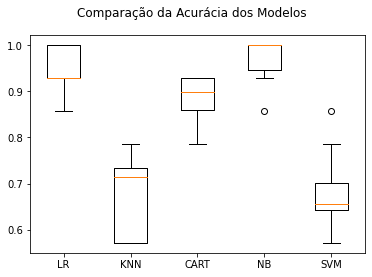

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

Analisando os resultados, verificamos que, considerando a acurácia média, o modelo treinado com o Naive Bayes apresentou os melhores resultados (97% de acurácia média) seguido do modelo treinado com a Regressão Logística (94% de acurácia média), ambos com desvio padrão equivalente (5%). Já analisando os bloxpots, vemos que a mediana da acurácia do modelo treinado com o Naive Bayes é superior à do modelo treinado com a Regressão Logística, indicando que possivelmente seguiríamos com o Naive Bayes como escolha de algoritmo. Neste caso, construiremos um novo modelo, treinado com toda a base de treino. Este modelo será avaliado utilizando a base de teste:

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test) 

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

1.0


Repare que conseguimos obter uma acurácia de teste de 100%. Reforçamos que este resultado não é comum quando trabalhamos com dados de problemas reais, mas possível com datasets simplificados similares a este, trabalhados e disponibilizados apenas para fins acadêmicos.

Ressaltamos que esse é um exemplo simples, apenas para ilustrar neste livro a aplicação de algoritmos de Machine Learning. Em problemas reais (com dados mais "sujos" e complexos), iríamos provavelmente trabalhar com algumas operações de pré-processamento de dados (tais como Normalização e Padronização, para dados quantitativos, e One-Hot-Encoding, para dados qualitativos nominais) e também experimentar variar os hiperparâmetros dos algoritmos, o que resultaria em um código mais complexo, como veremos nos capítulos a seguir.